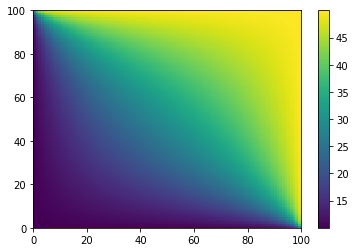

In [2]:
#!/usr/bin/env python

import numpy as np
from scipy.sparse import spdiags
from scipy.sparse import eye
from scipy.sparse import kron
from scipy.sparse.linalg import spsolve
import matplotlib.pylab as plt
import sys

## Resolution de l'equation de la chaleur stationnaire en 2D
## (Equation de diffusion) ---> 0 = k( dxxT + dyyT )

## Conditions aux limites
Tyo = 10.0  # Temperature pour Tio
Txo = 10.0  # Temperature pour Tin+1, Tn+1j et Toj
Tyn1 = 50.0
Txn1 = 50.0


## Nombre de points pour la discretisation et longueur du domaine
## (carre ici avec nx = ny)
nx = 100
ny = 100
Lx = 100.0
Ly = 100.0

N = nx * ny
## On impose le pas sachant qu'on utilise quatre conditions de Dirichlet
dx = Lx / (nx + 1)
dy = Ly / (ny - 1)

## Initialisation du vecteur temperature
T = np.zeros(nx * ny)

## Initialisation des parametres presents dans la matrice nx*ny
ao = 1 / (dx ** 2)
co = ao
do = 1 / (dy ** 2)
eo = do
bxo = -2 / (dx ** 2)
byo = -2 / (dy ** 2)

a = np.ones(nx) * ao
c = a
d = np.ones(ny) * do
e = d
bx = np.ones(nx) * bxo
by = np.ones(ny) * byo

## Creation tridiagonales en x et y
datax = np.array([a, bx, c])
diagsx = np.array([-1, 0, 1])
D2x = spdiags(datax, diagsx, nx, nx)
# D2x.toarray() #pour voir la matrice complete
datay = np.array([d, by, e])
diagsy = np.array([-1, 0, 1])
D2y = spdiags(datay, diagsy, ny, ny)

## Produit de Kronecker (=produit tensoriel)
kx = kron(eye(ny), (D2x))  ## On met ny fois D2x sur la diagonale
ky = kron(D2y, eye(nx))  ## On met la matrice identite (x) e by d dans D2y
A = kx + ky
# plt.spy(A)
# plt.show() ## Visualisation de la matrice A

## Creation du vecteur B avec les conditions aux limites adequates
B = np.zeros((nx * ny, 1))
for j in range(ny):
    ## Ajout des conditions aux limites pour i=0 et i=nx+1 (l'extremité selon x)
    B[j * nx] = -Txo * ao
    B[j * nx + nx - 1] = -Txn1 * co

## Ajout des conditions aux limites pour j=0 et j=ny+1 (l'extremité selon y)
B[0:nx] = B[0:nx] - Tyo * eo
B[N - nx : N] = B[N - nx : N] - Tyn1 * do

T = spsolve(A, B)
T2 = T.reshape(nx, ny)
plt.pcolor(T2)
plt.colorbar()
plt.show()
